# Projeto BD 

In [1]:
import os
import sqlite3
import pandas as pd
import numpy as np
from numpy.random import randint, randn, rand
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def create_table(name='data'):
    c.execute(f"CREATE TABLE IF NOT EXISTS {name} (id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,"\
    "x1 varFLOAT(8, 2), "\
    "x2 varFLOAT(8, 2), "\
    "x3 varFLOAT(8, 2), "\
    "y varFLOAT(8, 2))")

    
def data_insert_raw(x1, x2, x3, y, name="data"):
    c.execute(f"INSERT INTO {name} (x1, x2, x3, y) VALUES (?, ?, ?, ?)", 
              (x1, x2, x3, y))
    con.commit()
    
    
def read_all_data():
    c.execute("SELECT * FROM DATA")
    for raw in c.fetchall():
        print(raw)
        

def read_record(cond = - np.inf):
    c.execute(f"SELECT * FROM PRODUTOS WHERE valor > {cond}")
    for linha in c.fetchall():
        print(linha)      
        
def read_column(i_column):
    c.execute("SELECT * FROM DATA")
    for raw in c.fetchall():
        print(raw[i_column])  
        

def update_data(new_value = 0, cond = np.inf):
    c.execute(f"UPDATE produtos SET valor = {new_value} WHERE valor > {cond}")
    con.commit()
    
    
def remove_data(num):
    c.execute(f"DELETE FROM data WHERE valor = {num}")
    con.commit()
    

def remove_all_data(name="data"):
    c.execute(f"DELETE FROM {name}")
    con.commit()


def remove_db(name="dataStorage"):
    os.remove(f"{name}.db") if os.path.exists(f"{name}.db") else None
    

## Conectando o banco de dados

In [3]:
# c.execute("DROP TABLE Filme")
# c.execute("DROP TABLE Participa_Filme_Ator")
# c.execute("DROP TABLE Ator")
# c.execute("DROP TABLE Sessao")
# c.execute("DROP TABLE Data")
# c.execute("DROP TABLE Sala")
# c.execute("DROP TABLE Produto")
# c.execute("DROP TABLE Lanchonete")
# c.execute("DROP TABLE Cliente")
# c.execute("DROP TABLE Pedido")
# c.execute("DROP TABLE Compra")
# c.execute("DROP TABLE Ingresso")
# con.commit()
# remove_db("cinemaSauro.db")

In [4]:
con = sqlite3.connect('cinemaSauro.db')

In [5]:
c = con.cursor()

### 1. Criando tabelas

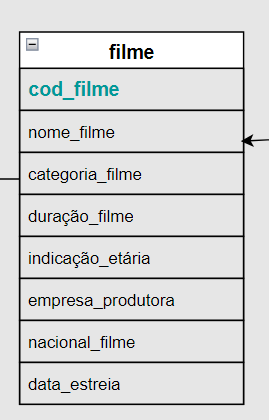

In [6]:
# Criando tabela FILME
c.execute(f"CREATE TABLE IF NOT EXISTS Filme"\
    "(cod_filme varCHAR PRIMARY KEY NOT NULL,"\
    "nome_filme varCHAR, "\
    "categoria_filme varCHAR, "\
    "duracao_filme INT, "\
    "indicacao_etaria INT,"\
    "empresa_produtora varCHAR,"\
    "nacional_filme BOOL,"\
    "data_estreia DATE)")
con.commit()

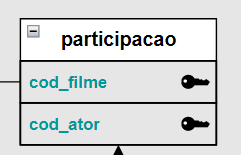

In [7]:
# Criando tabela Participa_Filme_Ator
c.execute(f"CREATE TABLE IF NOT EXISTS Participa_Filme_Ator"\
    "(cod_filme varCHAR,"\
    "cod_ator varCHAR)")
con.commit()

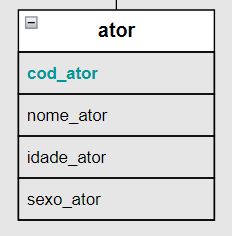

In [8]:
# Criando tabela ATOR
c.execute(f"CREATE TABLE IF NOT EXISTS Ator"\
    "(cod_ator varCHAR PRIMARY KEY NOT NULL,"\
    "nome_ator varCHAR, "\
    "idade_ator INT, "\
    "sexo_ator CHAR(1))")
con.commit()

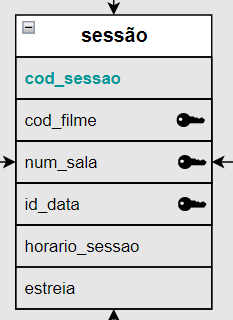

In [9]:
# Criando tabela SESSAO
c.execute(f"CREATE TABLE IF NOT EXISTS Sessao"\
    "(cod_sessao varCHAR PRIMARY KEY NOT NULL,"\
    "cod_filme varCHAR, "\
    "num_sala INT, "\
    "id_data varCHAR, "\
    "horario_sessao TIME, "\
    "estreia BOOL)")
con.commit()

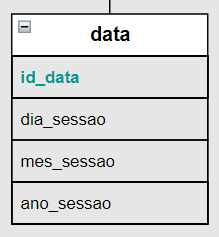

In [10]:
# Criando tabela DATA
c.execute(f"CREATE TABLE IF NOT EXISTS Data"\
    "(id_data varCHAR PRIMARY KEY NOT NULL,"\
    "dia_sessao SMALLINT, "\
    "mes_sessao SMALLINT, "\
    "ano_sessao INT)"\
    )
con.commit()

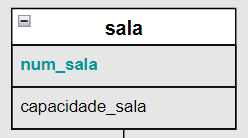

In [11]:
# Criando tabela SALA
c.execute(f"CREATE TABLE IF NOT EXISTS Sala"\
    "(num_sala INT PRIMARY KEY NOT NULL,"\
    "capacidade_sala INT)"
    )
con.commit()

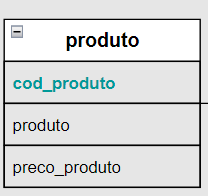

In [12]:
# tabela PRODUTO
c.execute(f"CREATE TABLE IF NOT EXISTS Produto"\
    "(cod_produto varCHAR PRIMARY KEY NOT NULL,"\
    "produto varCHAR,"\
    "preco_produto FLOAT)"
    )
con.commit()

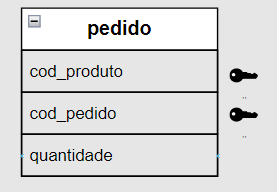

In [134]:
# tabela PEDIDO
c.execute(f"CREATE TABLE IF NOT EXISTS Pedido"\
    "(cod_produto varCHAR,"\
    "cod_pedido varCHAR,"\
    "quantidade INT)"
    )
con.commit()

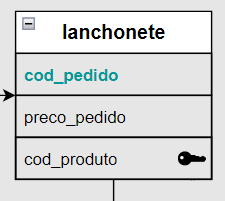

In [13]:
# tabela LANCHONETE
c.execute(f"CREATE TABLE IF NOT EXISTS Lanchonete"\
    "(cod_pedido INT PRIMARY KEY NOT NULL,"\
    "preco_produto FLOAT,"\
    "cod_produto varCHAR)"
    )
con.commit()

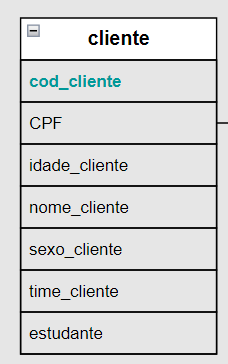

In [14]:
# tabela CLIENTE
c.execute(f"CREATE TABLE IF NOT EXISTS Cliente"\
    "(cod_cliente varCHAR PRIMARY KEY NOT NULL,"\
    "CPF varCHAR,"\
    "idade_cliente SMALLINT,"\
    "nome_cliente varCHAR,"\
    "sexo_cliente CHAR(1),"\
    "time_cliente varCHAR,"\
    "estudante BOOL)"
    )
con.commit()

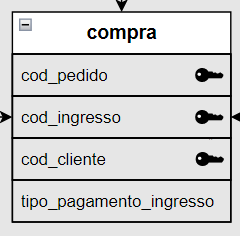

In [15]:
# tabela COMPRA
c.execute(f"CREATE TABLE IF NOT EXISTS Compra"\
    "(cod_pedido varCHAR,"\
    "cod_ingresso varCHAR,"\
    "cod_cliente varCHAR,"\
    "tipo_pagamento varCHAR)"
    )
con.commit()

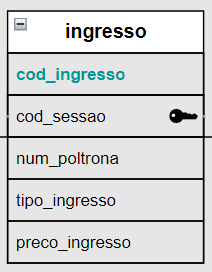

In [16]:
# tabela INGRESSO
c.execute(f"CREATE TABLE IF NOT EXISTS Ingresso"\
    "(cod_ingresso varCHAR PRIMARY KEY NOT NULL,"\
    "cod_sessao varCHAR,"
    "num_poltrona SMALLINT,"\
    "tipo_ingresso varCHAR,"\
    "preco_ingresso FLOAT)"
    )
con.commit()

### 2. Adicionando Registros

In [63]:
def cadastra_novo_filme(c, cod_filme, 
                        nome_filme,
                        categoria_filme,
                        duracao_filme,
                        indicacao_etaria,
                        empresa_produtora,
                        nacional_filme,
                        data_estreia,
                        lista_dict_atores):
    
    all_cod_filme = []
    c.execute(f"SELECT cod_filme FROM Filme")
    for raw in c.fetchall():
        all_cod_filme.append(raw[0])
    
    if cod_filme in all_cod_filme:
        print("Código de filme já cadastrado no sistema!")
        con.commit()
        return
    
    c.execute("INSERT INTO Filme (cod_filme,"\
              "nome_filme,"\
              "categoria_filme,"\
              "duracao_filme,"\
              "indicacao_etaria,"\
              "empresa_produtora,"\
              "nacional_filme,"\
              "data_estreia) VALUES (?, ?, ?, ?, ?, ?, ?, ?)", 
                (cod_filme,
                nome_filme,
                categoria_filme,
                duracao_filme,
                indicacao_etaria,
                empresa_produtora,
                nacional_filme,
                data_estreia))
    
    for dict_ator in lista_dict_atores:
        
        c.execute("INSERT INTO Participa_Filme_Ator"\
                    "(cod_filme,"\
                    "cod_ator) VALUES (?, ?)",
                    (cod_filme,
                    dict_ator['cod_ator']))
        
        all_cod_ator = []
        c.execute(f"SELECT cod_ator FROM Ator")
        for raw in c.fetchall():
            all_cod_ator.append(raw[0])

            
        if dict_ator['cod_ator'] not in all_cod_ator:
            c.execute("INSERT INTO Ator"\
                        "(cod_ator,"\
                        "nome_ator, "\
                        "idade_ator, "\
                        "sexo_ator) VALUES (?, ?, ?, ?)",
                            (dict_ator['cod_ator'],
                             dict_ator['nome'],
                             dict_ator['idade'],
                             dict_ator['sexo']))

    con.commit()

In [64]:
# cadatro de filme
def novo_filme():
    cod_filme = ""
    nome_filme = ""
    categoria_filme = ""
    duracao_filme = 0
    indicacao_etaria = 0
    empresa_produtora = ""
    nacional_filme = False
    data_estreia = "9999/12/31"
    lista_dict_atores = []

    print("Cadastre um novo filme: ")

    cod_filme = input("Codigo filme: ").strip()
    nome_filme = input("Nome filme: ").strip()
    categoria_filme = input("Categoria Filme: ").strip()
    duracao_filme = int(input("Duracao Filme: (mintos) "))
    indicacao_etaria = int(input("Indicacao etaria Filme: "))
    empresa_produtora = input("Empresa Produtora filme: ")
    nacional_filme = int(input("Filme Nacional? [Sim - 1, Nao - 0] "))
    dia, mes, ano = input("Data de estreia: [dd/mm/aaaa] ").split("/")
    data_estreia = f"{ano}/{mes}/{dia}"
    n_atores = int(input("Quantos atores no filme? "))

    for i in range(1, n_atores + 1):
        cod_ator = input(f"Código ator/atriz {i}: ")
        nome_ator = input(f"Nome ator/atriz {i}: ")
        idade_ator = int(input(f"Idade ator/atriz {i}: "))
        sexo_ator = input(f"Sexo ator/atriz {i}: [M - Masculino, F - Feminino] ").upper().strip()[0]
        lista_dict_atores.append(
            {
                "cod_ator": cod_ator,
                "nome": nome_ator,
                "idade": idade_ator,
                "sexo": sexo_ator
            }
        )

    cadastra_novo_filme(c, cod_filme, 
                            nome_filme,
                            categoria_filme,
                            duracao_filme,
                            indicacao_etaria,
                            empresa_produtora,
                            nacional_filme,
                            data_estreia,
                            lista_dict_atores)

In [97]:
cod_filme = "1234"
nome_filme = "CDIA"
categoria_filme = "Terror"
duracao_filme = 120
indicacao_etaria = 14
empresa_produtora = "UFPB"
nacional_filme = 1
data_estreia = "2022/12/01"
lista_dict_atores = [
    {
        "cod_ator": "12341",
        "nome": "Guilherme Iram",
        "idade": 21,
        "sexo": 'M'
    },
    {
        "cod_ator": "12342",
        "nome": "Angela Thais",
        "idade": 22,
        "sexo": 'F'
    },
    {
        "cod_ator": "12343",
        "nome": "Guilherme Pujoni",
        "idade": 22,
        "sexo": "M"
    }
]

cadastra_novo_filme(c, cod_filme, 
                        nome_filme,
                        categoria_filme,
                        duracao_filme,
                        indicacao_etaria,
                        empresa_produtora,
                        nacional_filme,
                        data_estreia,
                        lista_dict_atores)

In [118]:
def remove_filme(nome_filme="", cod_filme=""):
    
    if nome_filme != "":
        
        cod = 0
        c.execute(f"SELECT nome_filme,  cod_filme FROM Filme where nome_filme = '{nome_filme}'")
        for raw in c.fetchall():
            _, cod = raw
        c.execute(f"DELETE FROM Filme where cod_filme = '{cod}'")
        c.execute(f"DELETE FROM Participa_Filme_Ator where cod_filme = '{cod}'")
        con.commit()
        return
    
    if cod_filme != "":
        c.execute(f"DELETE FROM Filme where cod_filme = '{cod_filme}'")
        c.execute(f"DELETE FROM Participa_Filme_Ator where cod_filme = '{cod_filme}'")
    
    con.commit()

In [127]:
def cadastra_nova_sessao(cod_sessao,
                        cod_filme,
                        num_sala,
                        id_data,
                        horario_sessao,
                        estreia,
                        dia,
                        mes,
                        ano):
    
    c.execute("SELECT cod_sessao FROM Sessao")
    all_cod_sessao = []
    for raw in c.fetchall():
        all_cod_sessao.append(raw[0])
    
    c.execute("SELECT cod_filme FROM Filme")
    all_cod_filmes = []
    for raw in c.fetchall():
        all_cod_filmes.append(raw[0])
    
    c.execute("SELECT num_sala FROM Sala")
    all_num_sala = []
    for raw in c.fetchall():
        all_num_sala.append(raw[0])
    
    if cod_sessao in all_cod_sessao:
        print("Código de sessão duplicado!")
        return
    
    elif cod_filme not in all_cod_filmes:
        print("Filme não cadastrado no cinema para se criar uma sessao!")
        return
    
    elif num_sala not in all_num_sala:
        print("Sala não existe e/ou não está disponível para sessão!")
        return
    
    else:
        print("Criando sessao ...")
    
        c.execute("INSERT INTO Sessao (cod_sessao,"\
                  "cod_filme,"\
                  "num_sala,"\
                  "id_data,"\
                  "horario_sessao,"\
                  "estreia) VALUES (?, ?, ?, ?, ?, ?)", 
                    (cod_sessao,
                    cod_filme,
                    num_sala,
                    id_data,
                    horario_sessao,
                    estreia))
        
        c.execute("INSERT INTO Data (id_data,"\
                  "dia_sessao,"\
                  "mes_sessao,"\
                  "ano_sessao) VALUES (?, ?, ?, ?)", 
                    (id_data,
                    dia_sessao,
                    mes_sessao,
                    ano_sessao))
        
        con.commit()
        

In [128]:
cod_sessao = "1234"
cod_filme = "1234"
num_sala = 1
id_data = "1234"
horario_sessao = "18:00:00"
estreia = 1
dia_sessao = 1
mes_sessao = 12
ano_sessao = 2022

cadastrar_sala(1, 50)

cadastra_nova_sessao(
    cod_sessao,
    cod_filme,
    num_sala,
    id_data,
    horario_sessao,
    estreia,
    dia_sessao,
    mes_sessao,
    ano_sessao
)

Número de sala já ocupado!
Código de sessão duplicado!


In [132]:
cod_sessao = "1234"
cod_filme = "1234"
num_sala = 1
id_data = "1234"
horario_sessao = "20:00:00"
estreia = 1
dia_sessao = 1
mes_sessao = 12
ano_sessao = 2022

cadastrar_sala(1, 50)

cadastra_nova_sessao(
    cod_sessao,
    cod_filme,
    num_sala,
    id_data,
    horario_sessao,
    estreia,
    dia_sessao,
    mes_sessao,
    ano_sessao
)

Número de sala já ocupado!
Criando sessao ...


In [121]:
def cadastrar_sala(num_sala, capacidade_sala):
    
    c.execute("SELECT num_sala FROM Sala")
    all_num_sala = []
    for raw in c.fetchall():
        all_num_sala.append(raw[0])
        
    if num_sala not in all_num_sala: 
        c.execute("INSERT INTO Sala (num_sala,"\
                      "capacidade_sala) VALUES (?, ?)", 
                        (num_sala,
                        capacidade_sala))
    else:
        print("Número de sala já ocupado!")
        return
    
    con.commit()

In [130]:
def remover_sessao(cod_sessao):
    id_data = None
    c.execute(f"SELECT id_data, cod_sessao FROM sessao WHERE cod_sessao = '{cod_sessao}'")
    for raw in c.fetchall():
        id_data = raw[0]
    c.execute(f"DELETE FROM Sessao where cod_sessao = '{cod_sessao}'")
    c.execute(f"DELETE FROM Data where id_data = '{id_data}'")
    con.commit()

In [133]:
remover_sessao("1234")

In [138]:
def cadastra_compra_cliente(
    cod_cliente,
    CPF,
    idade_cliente,
    nome_cliente,
    sexo_cliente,
    time_cliente,
    estudante, # bool
    cod_ingresso,
    cod_pedido, 
    pedido,
    tipo_pagamento_ingresso,
    cod_sessao,
    nun_poltrona,
    tipo_engresso
):
    pass

In [92]:
def remove_compra_cliente():
    pass

In [93]:
# remove_filme(cod_filme="1234")

In [ ]:
# c.close()